In [1]:
#libraries imported
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#MNIST data was imported using keras API
mnist = tf.keras.datasets.mnist.load_data()

In [3]:
(X, y), (x_test, y_test) = mnist

In [4]:
#a batch of 1000 images were selected randomly from the training data
np.random.seed(42)

m = 1000
idx = np.random.permutation(60000)[:m]

X = X[idx]
y = y[idx]

In [5]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.05, images=None, figsize=(13, 10)):
    #scaling
    X_normalized = MinMaxScaler().fit_transform(X)
    #list of the digits coordinates is made
    neighbors = np.array([[10., 10.]])
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("gist_rainbow")
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1], c=[cmap(digit / 9)])
    plt.axis("off")
    ax = plt.gcf().gca()  # get current axes in current figure
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(y[index] / 9), fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"), image_coord)
                ax.add_artist(imagebox)

tSNE took 19.8s.


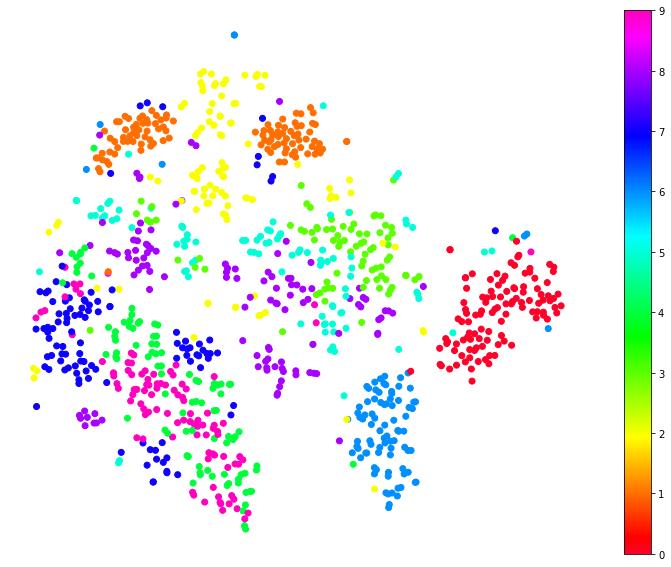

In [6]:
from sklearn.manifold import TSNE
import time
t0 = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X.reshape(X.shape[0],784))
t1 = time.time()
print("tSNE took {:.1f}s.".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="gist_rainbow")
plt.axis('off')
plt.colorbar()
plt.show()

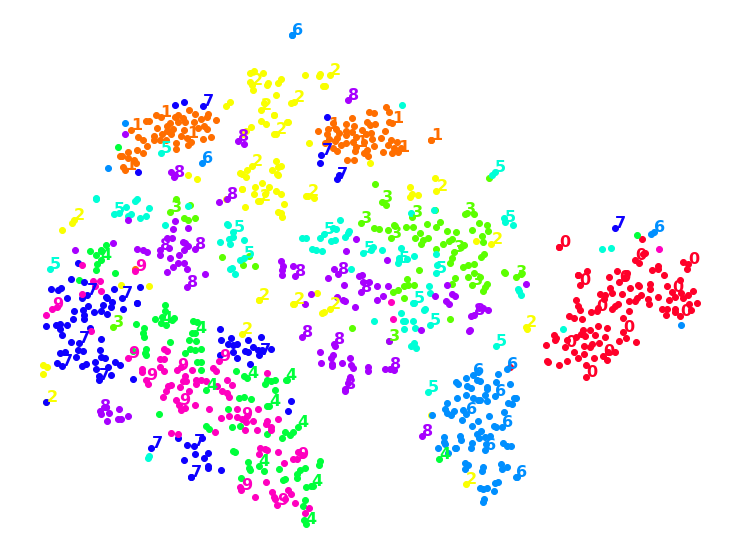

In [7]:
plot_digits(X_reduced, y)

PCA took 0.1s.


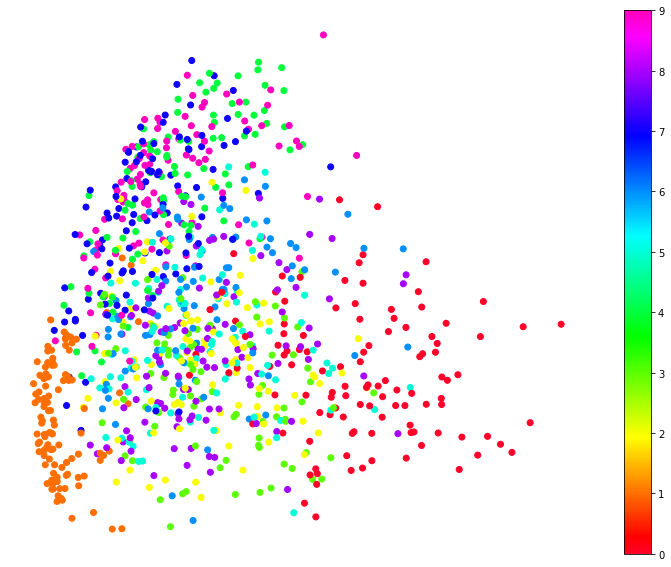

In [8]:
from sklearn.decomposition import PCA
import time

t0 = time.time()
X_pca_reduced = PCA(n_components=2, random_state=42).fit_transform(X.reshape(X.shape[0],784))
t1 = time.time()
print("PCA took {:.1f}s.".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_pca_reduced[:, 0], X_pca_reduced[:, 1], c=y, cmap="gist_rainbow")
plt.axis('off')
plt.colorbar()
plt.show()

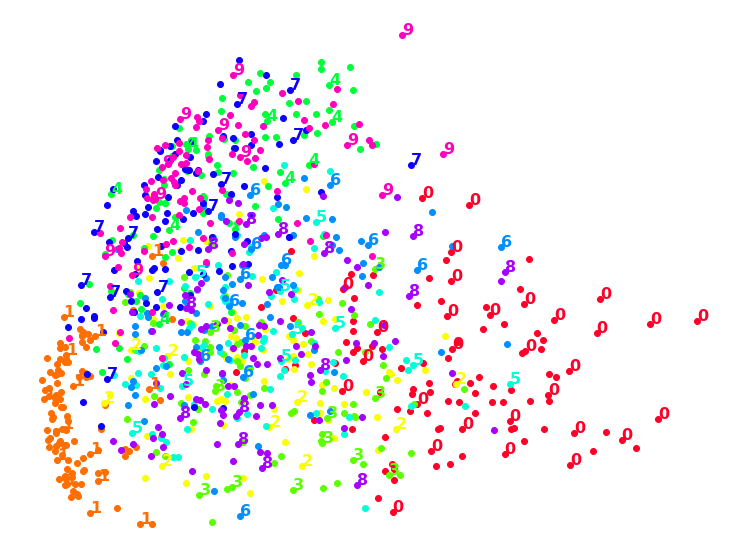

In [9]:
plot_digits(X_pca_reduced, y)

LLE took 3.6s.


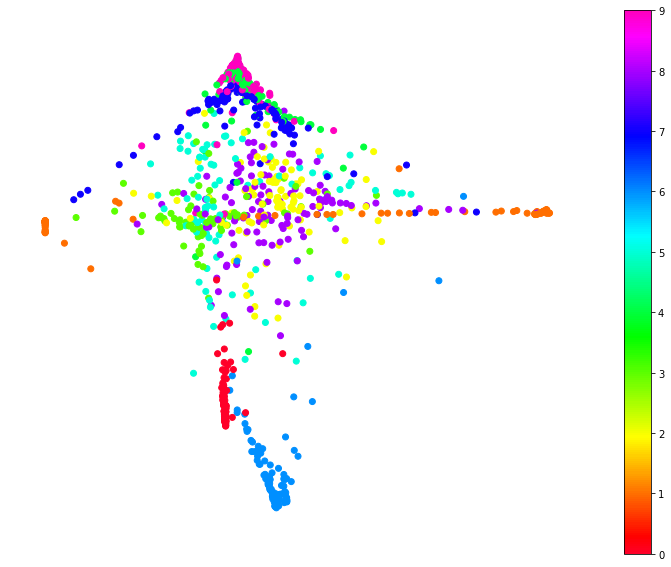

In [10]:
from sklearn.manifold import LocallyLinearEmbedding

t0 = time.time()
X_lle_reduced = LocallyLinearEmbedding(n_components=2, random_state=42).fit_transform(X.reshape(X.shape[0],784))
t1 = time.time()
print("LLE took {:.1f}s.".format(t1 - t0))

plt.figure(figsize=(13,10))
plt.scatter(X_lle_reduced[:, 0], X_lle_reduced[:, 1], c=y, cmap="gist_rainbow")
plt.axis('off')
plt.colorbar()
plt.show()

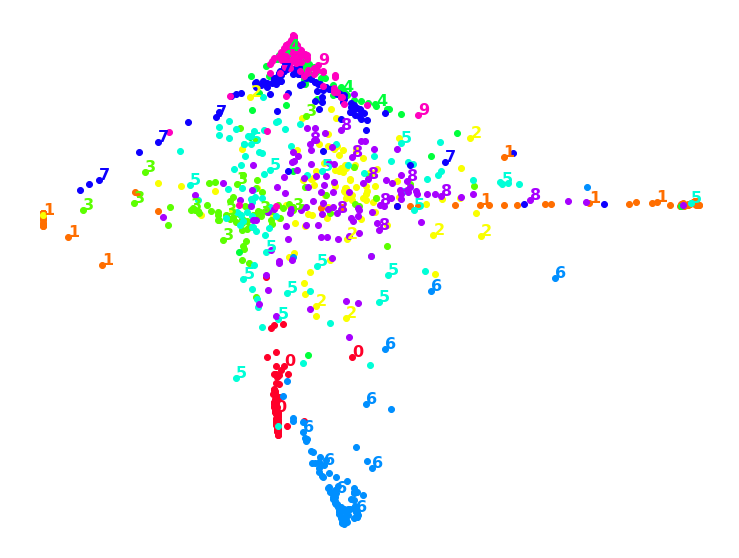

In [11]:
plot_digits(X_lle_reduced, y)

MDS took 87.9s


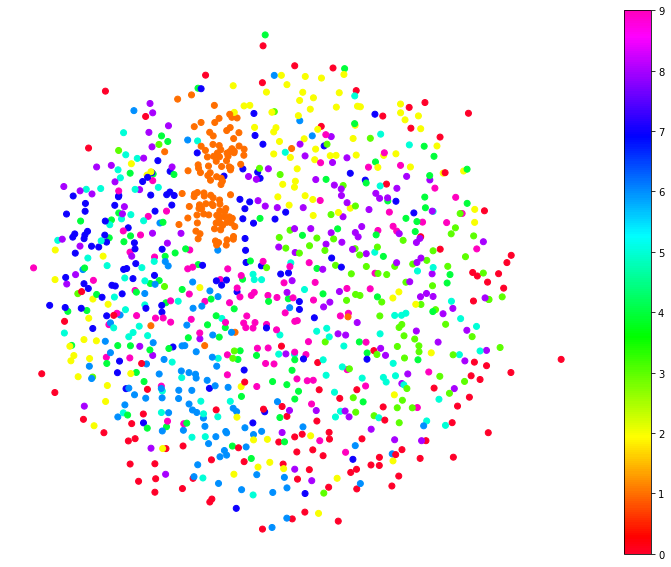

In [12]:
from sklearn.manifold import MDS
t0 = time.time()
X_mds_reduced = MDS(n_components=2, random_state=42).fit_transform(X.reshape(X.shape[0],784)[:m])
t1 = time.time()
print("MDS took {:.1f}s".format(t1 - t0))
plt.figure(figsize=(13,10))
plt.scatter(X_mds_reduced[:, 0], X_mds_reduced[:, 1], c=y, cmap="gist_rainbow")
plt.axis('off')
plt.colorbar()
plt.show()

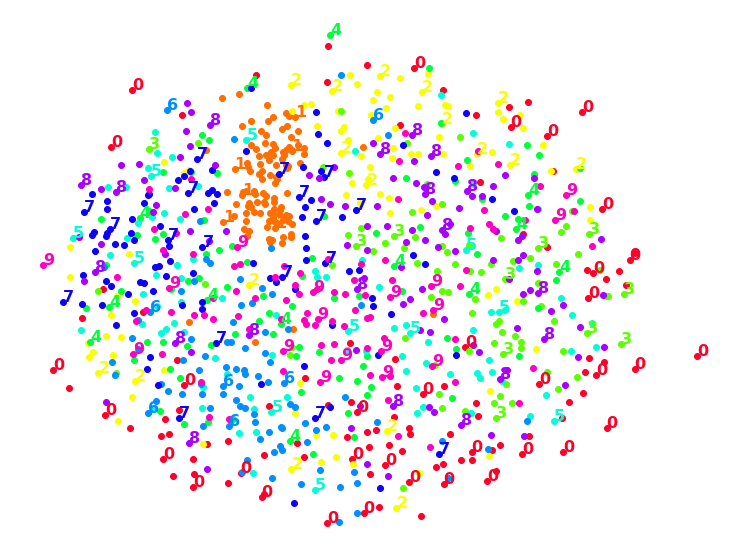

In [13]:
plot_digits(X_mds_reduced, y)

RP took 0.0s.


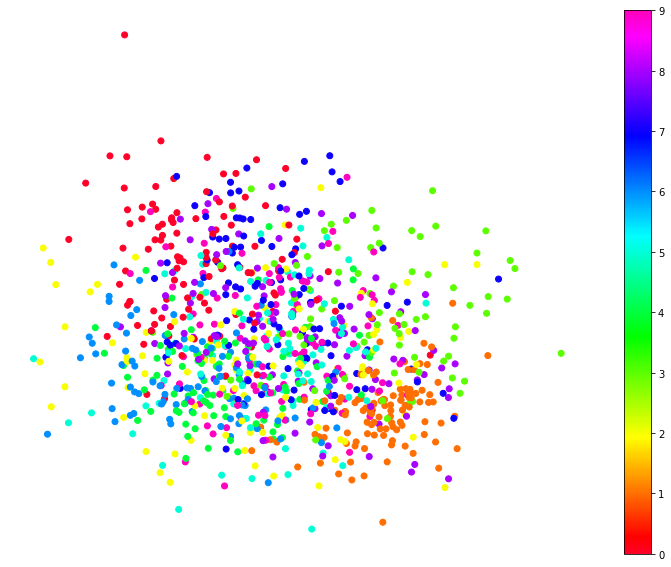

In [14]:
from sklearn import random_projection
t0 = time.time()
X_RP_reduced = random_projection.GaussianRandomProjection(n_components=2, random_state=42).fit_transform(X.reshape(X.shape[0],784))
t1 = time.time()
print("RP took {:.1f}s.".format(t1 - t0))

plt.figure(figsize=(13,10))
plt.scatter(X_RP_reduced[:, 0], X_RP_reduced[:, 1], c=y, cmap="gist_rainbow")
plt.axis('off')
plt.colorbar()
plt.show()

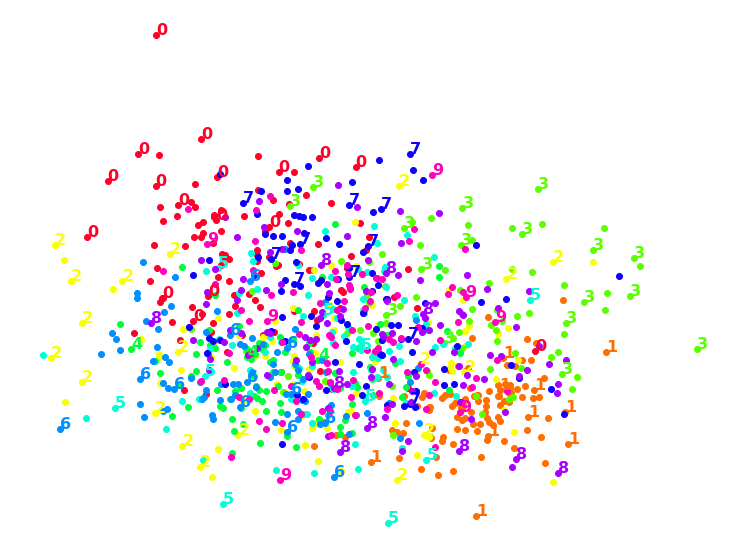

In [15]:
plot_digits(X_RP_reduced, y)

RP took 0.0s.


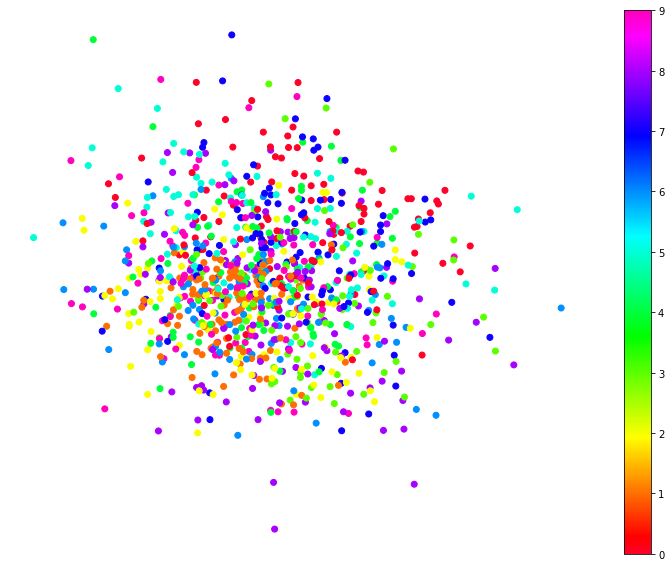

In [16]:
t0 = time.time()
X_SparseRP_reduced = random_projection.SparseRandomProjection(n_components=2, random_state=42).fit_transform(X.reshape(X.shape[0],784))
t1 = time.time()
print("RP took {:.1f}s.".format(t1 - t0))

plt.figure(figsize=(13,10))
plt.scatter(X_SparseRP_reduced[:, 0], X_SparseRP_reduced[:, 1], c=y, cmap="gist_rainbow")
plt.axis('off')
plt.colorbar()
plt.show()

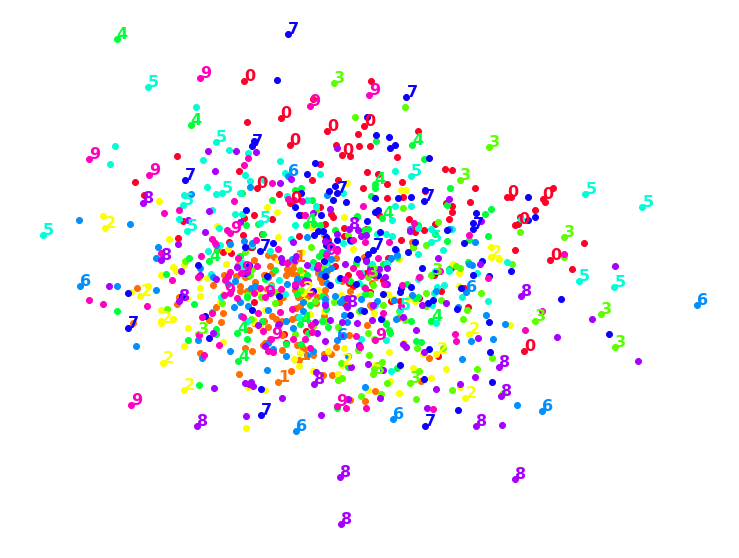

In [17]:
plot_digits(X_SparseRP_reduced, y)